<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [25]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [4]:
# your code goes here

import matplotlib as mpl
import matplotlib.pyplot as plt




In [5]:
df['ConvertedComp']


0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

In [7]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot: ylabel='Frequency'>

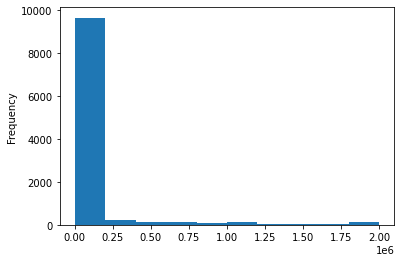

In [9]:
df['ConvertedComp'].plot(kind='hist')

What is the median of the column `ConvertedComp`?


In [10]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [11]:
(df['Gender'] == 'Man').sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:
# your code goes here
(df['Gender'] == 'Woman').sum()

731

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [13]:
# your code goes here

print ( 'min = ', df['Age'].min(),
'Q1 = ', df['Age'].quantile(0.25),
'Median = ', df['Age'].median(),
'Q3 = ', df['Age'].quantile(0.75),
'Max = ', df['Age'].max())


min =  16.0 Q1 =  25.0 Median =  29.0 Q3 =  35.0 Max =  99.0


<AxesSubplot: >

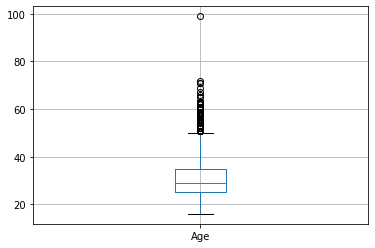

In [22]:
df.boxplot(column =['Age'])

Plot a histogram of the column `Age`.


<AxesSubplot: ylabel='Frequency'>

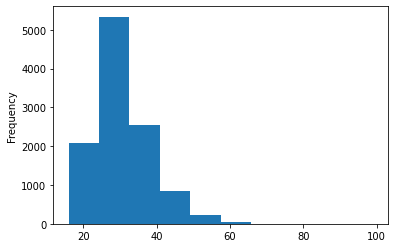

In [14]:
# your code goes here
df['Age'].plot(kind='hist')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot: >

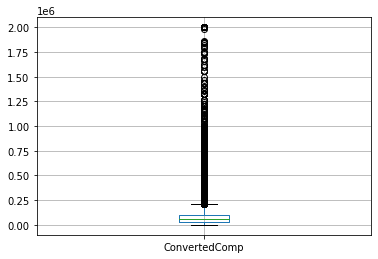

In [15]:
df.boxplot(column =['ConvertedComp'])

In [16]:
df.ConvertedComp.describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:
# your code goes here
q3 = df['ConvertedComp'].quantile(0.75)
q1 = df['ConvertedComp'].quantile(0.25)

IQR = q3 - q1
print( 'Q1 = ', q1, 'Q3 = ',q3, 'IQR = ',IQR)

Q1 =  26868.0 Q3 =  100000.0 IQR =  73132.0


Find out the upper and lower bounds.


In [20]:
lower_bound = 0.1
upper_bound = 0.95
res = df.ConvertedComp.quantile([lower_bound, upper_bound])
lb = df.ConvertedComp.quantile([lower_bound])
ub = df.ConvertedComp.quantile([upper_bound])
res

0.10     10755.6
0.95    651624.0
Name: ConvertedComp, dtype: float64

Identify how many outliers are there in the `ConvertedComp` column.


In [27]:
# your code goes here
true_index = (res.loc[lower_bound] < df.ConvertedComp.values) & \
    (df.ConvertedComp.values < res.loc[upper_bound])

false_index = ~true_index
df.ConvertedComp[false_index].count()

1591

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [41]:
# your code goes here
df_filtered = df[(df['ConvertedComp'] < 651624) & (df['ConvertedComp'] > 10755.6)]
df_filtered.ConvertedComp

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11391     68748.0
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
Name: ConvertedComp, Length: 8991, dtype: float64

## Correlation


In [51]:
print ('df = ', df.shape, 'new df = ', df_filtered.shape)

df =  (11398, 85) new df =  (8991, 85)


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# your code goes here


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
